In [1]:
import goldsberry
import pandas as pd
pd.set_option("display.max_columns", 20)
import matplotlib.pyplot as plt
from IPython.display import Image
Image("Find-game-ID-notes.png")

# gid = '0021500550'

# x = goldsberry.game.play_by_play(gid).player_info()
# y = pd.DataFrame(x)

from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

def plot_heatmap_of_made_shots(made,title):
    plt.figure(figsize=(12,11))
    plt.xlim(-300,300)
    plt.ylim(-100,500)


    heatmap = made[['LOC_X','LOC_Y']]
    heatmap['round_x'] = heatmap['LOC_X'].apply( lambda x: round(x/50.0)*50.0 )
    heatmap['round_y'] = heatmap['LOC_Y'].apply( lambda x: round(x/50.0)*50.0)
    heatmap['made']=1
#     tmp = heatmap.groupby(['round_x','round_y']).count().reset_index()
    # plt.scatter(heatmap['round_x'],heatmap['round_y'])


    heatmap, xedges, yedges = np.histogram2d(heatmap['LOC_X'], heatmap['LOC_Y'])
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    plt.clf()
    name = 'Reds'
    name='seismic'
    name= 'bwr'
    plt.imshow(heatmap.T, extent=extent, origin='lower',cmap=plt.get_cmap(name))
    draw_court(outer_lines=True, color="black")
    plt.suptitle(title)
    plt.show()
    
def shiftedColorMap(cmap, start=0, midpoint=0.5, stop=1.0, name='shiftedcmap'):
    '''
    Function to offset the "center" of a colormap. Useful for
    data with a negative min and positive max and you want the
    middle of the colormap's dynamic range to be at zero

    Input
    -----
      cmap : The matplotlib colormap to be altered
      start : Offset from lowest point in the colormap's range.
          Defaults to 0.0 (no lower ofset). Should be between
          0.0 and `midpoint`.
      midpoint : The new center of the colormap. Defaults to 
          0.5 (no shift). Should be between 0.0 and 1.0. In
          general, this should be  1 - vmax/(vmax + abs(vmin))
          For example if your data range from -15.0 to +5.0 and
          you want the center of the colormap at 0.0, `midpoint`
          should be set to  1 - 5/(5 + 15)) or 0.75
      stop : Offset from highets point in the colormap's range.
          Defaults to 1.0 (no upper ofset). Should be between
          `midpoint` and 1.0.
    '''
    cdict = {
        'red': [],
        'green': [],
        'blue': [],
        'alpha': []
    }

    # regular index to compute the colors
    reg_index = np.linspace(start, stop, 257)

    # shifted index to match the data
    shift_index = np.hstack([
        np.linspace(0.0, midpoint, 128, endpoint=False), 
        np.linspace(midpoint, 1.0, 129, endpoint=True)
    ])

    for ri, si in zip(reg_index, shift_index):
        r, g, b, a = cmap(ri)

        cdict['red'].append((si, r, r))
        cdict['green'].append((si, g, g))
        cdict['blue'].append((si, b, b))
        cdict['alpha'].append((si, a, a))

    newcmap = matplotlib.colors.LinearSegmentedColormap(name, cdict)
    plt.register_cmap(cmap=newcmap)

    return newcmap

ImportError: No module named goldsberry

In [1]:
#https://github.com/seemethere/nba_py/blob/master/nba_py/shotchart.py

# example: https://github.com/bradleyfay/py-Goldsberry/blob/master/docs/Visualizing%20NBA%20Shots%20with%20py-Goldsberry.ipynb
from datetime import datetime, timedelta
from dateutil import parser
from nba_py import shotchart
from nba_py.player import get_player
time =  datetime.now() - timedelta(days=10)

pid = get_player('Bradley', 'Beal')

_curr_year = datetime.now().year
_last_year = datetime.now().year -1
if datetime.now().month > 6:
    CURRENT_SEASON = str(_curr_year) + "-" + str(_curr_year + 1)[2:]
    LAST_SEASON= str(_last_year) + "-" + str(_last_year + 1)[2:]
else:
    CURRENT_SEASON = str(_curr_year - 1) + "-" + str(_curr_year)[2:]
    LAST_SEASON = str(_last_year - 1) + "-" + str(_last_year)[2:]
# some parameters: last_n_games=30
x = shotchart.ShotChart(pid,season =CURRENT_SEASON,last_n_games=3 ).shot_chart()
x_last_year = shotchart.ShotChart(pid,season =LAST_SEASON ,last_n_games=3).shot_chart()
# print x.head()
print 'done'


SyntaxError: Missing parentheses in call to 'print'. Did you mean print('done')? (<ipython-input-1-39c8b10054bd>, line 24)

Index([u'GRID_TYPE', u'GAME_ID', u'GAME_EVENT_ID', u'PLAYER_ID',
       u'PLAYER_NAME', u'TEAM_ID', u'TEAM_NAME', u'PERIOD',
       u'MINUTES_REMAINING', u'SECONDS_REMAINING', u'EVENT_TYPE',
       u'ACTION_TYPE', u'SHOT_TYPE', u'SHOT_ZONE_BASIC', u'SHOT_ZONE_AREA',
       u'SHOT_ZONE_RANGE', u'SHOT_DISTANCE', u'LOC_X', u'LOC_Y',
       u'SHOT_ATTEMPTED_FLAG', u'SHOT_MADE_FLAG', u'GAME_DATE', u'HTM',
       u'VTM'],
      dtype='object')


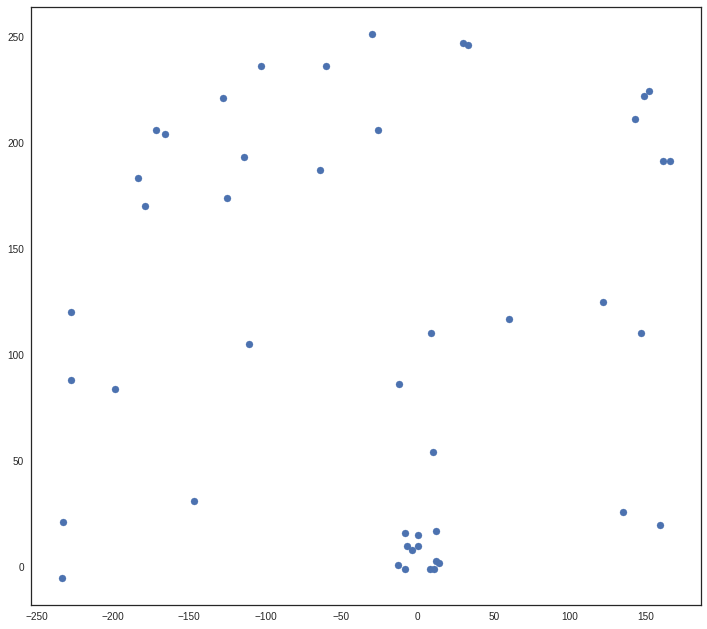

In [6]:
import numpy as np
from scipy.stats import binned_statistic_2d
import seaborn as sns
# from bokeh.plotting import figure
from math import pi


%matplotlib inline

import urllib
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle, Arc
urllib.__version__

print x.columns

sns.set_style("white")
sns.set_color_codes()
plt.figure(figsize=(12,11))
plt.scatter(x.LOC_X, x.LOC_Y)
plt.show()



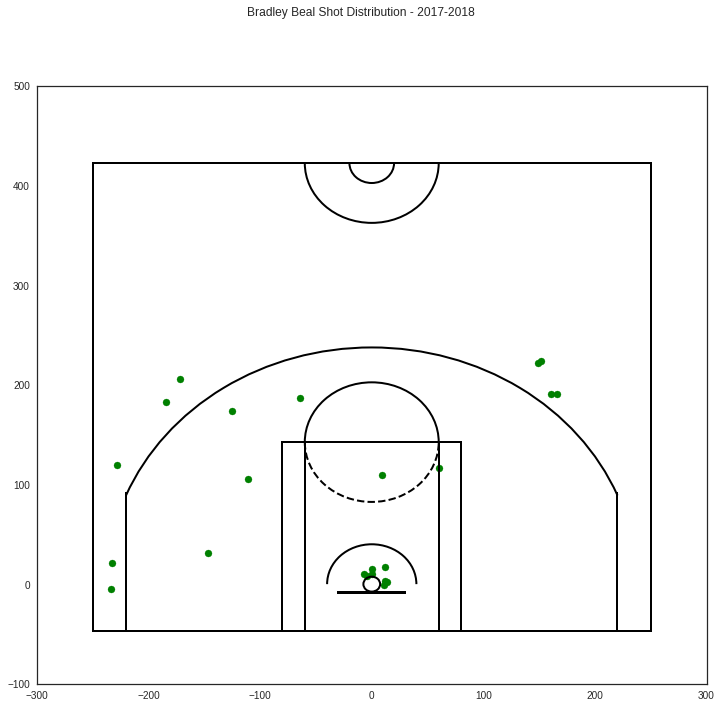

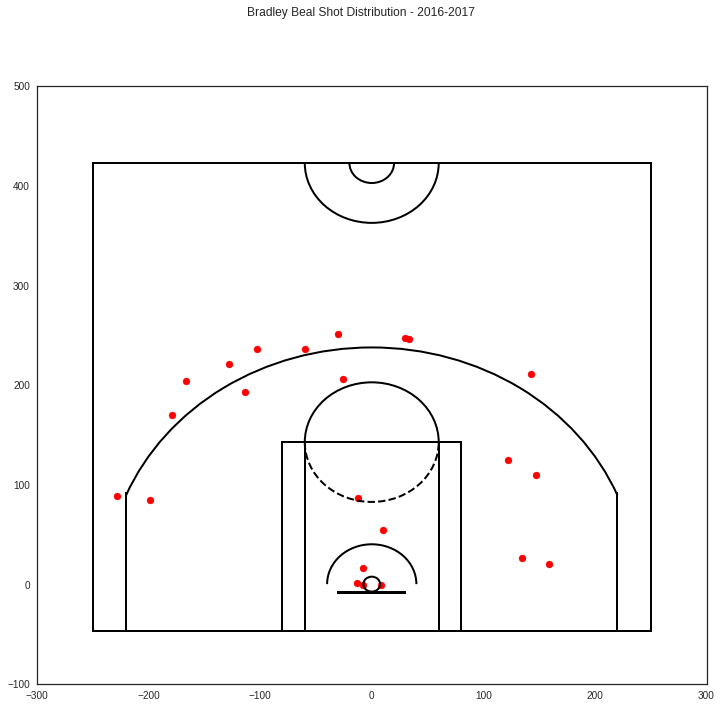

/usr/lib/python2.7/site-packages/ipykernel_launcher.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/lib/python2.7/site-packages/ipykernel_launcher.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/lib/python2.7/site-packages/ipykernel_launcher.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


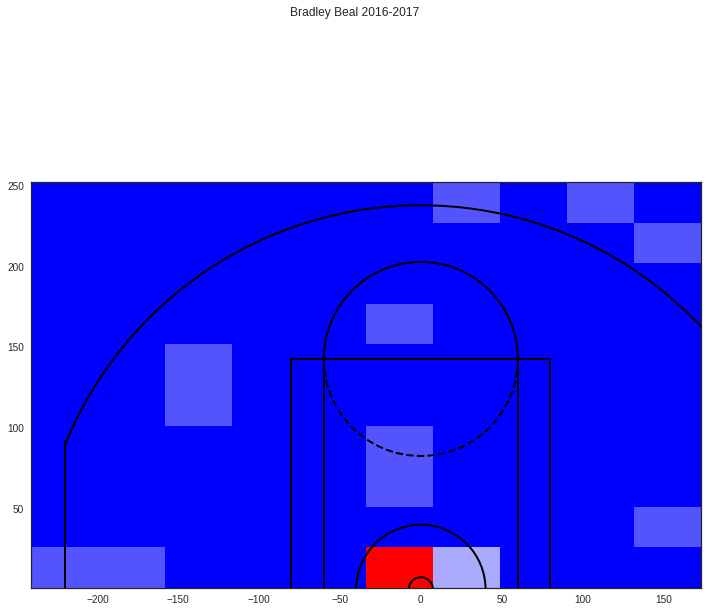

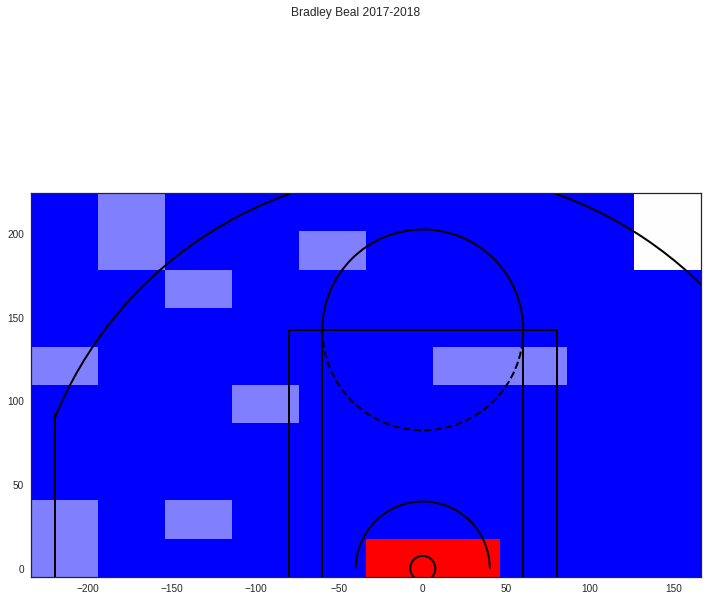

In [7]:


# plt.figure(figsize=(12,11))
# draw_court(outer_lines=True, color="red")
# plt.xlim(-300,300)
# plt.ylim(-100,500)
# plt.show()

made = x[x['SHOT_MADE_FLAG']==1]
missed = x[x['SHOT_MADE_FLAG']==0]
made_last_year = x_last_year[x_last_year['SHOT_MADE_FLAG']==1]
missed_last_year = x_last_year[x_last_year['SHOT_MADE_FLAG']==0]


plt.figure(figsize=(12,11))
plt.scatter(made.LOC_X, made.LOC_Y,color='green')
# plt.scatter(missed.LOC_X, missed.LOC_Y,color='red')
# plt.scatter(made_last_year.LOC_X, made_last_year.LOC_Y,color='red')
draw_court(outer_lines=True, color="black")
# Descending values along the axis from left to right
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.suptitle('Bradley Beal Shot Distribution - 2017-2018')
plt.show()


plt.figure(figsize=(12,11))
# plt.scatter(made.LOC_X, made.LOC_Y,color='green')
plt.scatter(missed.LOC_X, missed.LOC_Y,color='red')
# plt.scatter(made_last_year.LOC_X, made_last_year.LOC_Y,color='red')
draw_court(outer_lines=True, color="black")
# Descending values along the axis from left to right
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.suptitle('Bradley Beal Shot Distribution - 2016-2017')
plt.show()

plot_heatmap_of_made_shots(made_last_year,'Bradley Beal 2016-2017')
plot_heatmap_of_made_shots(made,'Bradley Beal 2017-2018')


/usr/lib/python2.7/site-packages/ipykernel_launcher.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/lib/python2.7/site-packages/ipykernel_launcher.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/lib/python2.7/site-packages/ipykernel_launcher.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


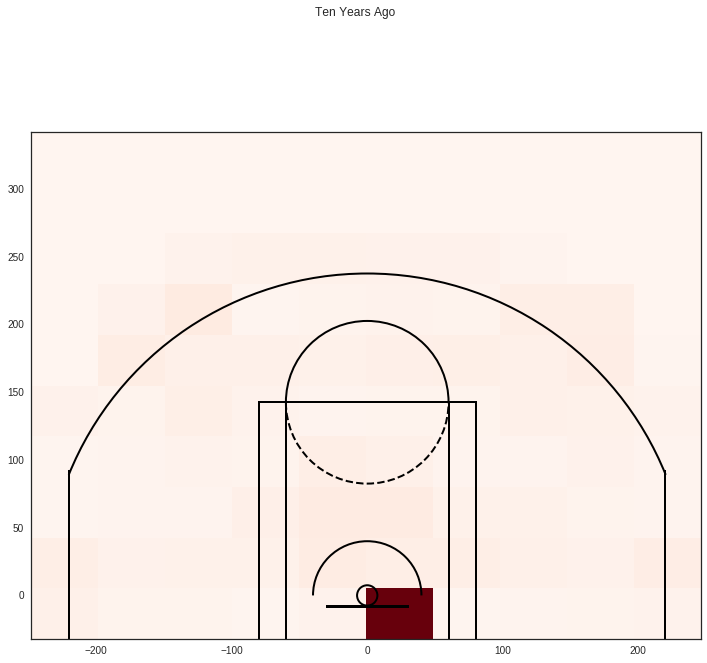

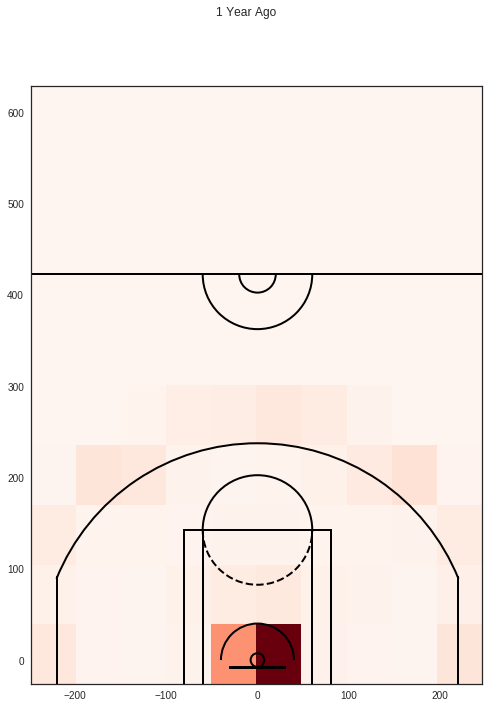

In [144]:
from  nba_py.team import *
from  nba_py.game import PlayerTracking


def get_team_shot_distribution_by_year(_last_year,team_id):

    if datetime.now().month > 6:
        SEASON = str(_last_year) + "-" + str(_last_year + 1)[2:]
    else:
        SEASON = str(_last_year - 1) + "-" + str(_last_year)[2:]

    # shotchart.ShotChart(team_id =1610612764 ,season =CURRENT_SEASON )
    # TeamShootingSplits('1610612764').shot_areas()
    df = pd.DataFrame([])
#     print TeamCommonRoster(team_id,season=SEASON).roster()
    players_from_that_time = TeamCommonRoster(team_id,season=SEASON).roster()['PLAYER_ID'].values
    for pid in players_from_that_time:
        x = shotchart.ShotChart(pid,season =SEASON ).shot_chart()
        df=df.append(x)
    return df
    
_last_year_10 = datetime.now().year -10
_this_year = datetime.now().year -1
df_10 = get_team_shot_distribution_by_year(_last_year_10,'1610612745')
df_1 = get_team_shot_distribution_by_year(_this_year,'1610612745')

# print df_10.head()
# print df_1.head()

made = df_10[df_10['SHOT_MADE_FLAG']==1]
missed = df_10[df_10['SHOT_MADE_FLAG']==0]
made_last_year = df_1[df_1['SHOT_MADE_FLAG']==1]
missed_last_year = df_1[df_1['SHOT_MADE_FLAG']==0]

plot_heatmap_of_made_shots(made,'Ten Years Ago')
plot_heatmap_of_made_shots(made_last_year,'1 Year Ago')

In [6]:
x
made = x[x['SHOT_MADE_FLAG']==1]
missed = x[x['SHOT_MADE_FLAG']==0]



# print made.head()
# print missed.head()

m_1 = made[['LOC_X','LOC_Y']]
m_1['made']=1

m_2 = missed[['LOC_X','LOC_Y']]
m_2['made']=0

m = m_1.append(m_2)
m['round_x'] = m['LOC_X'].apply( lambda x: round(x/50.0)*50.0 )
m['round_y'] = m['LOC_Y'].apply( lambda x: round(x/50.0)*50.0)
cnt_shots = m.groupby(['round_x','round_y']).count()[['made']]
cnt_shots=cnt_shots[cnt_shots['made']>1]
sum_shots_made = m.groupby(['round_x','round_y']).sum()[['made']]
merged = cnt_shots.merge(sum_shots_made,how='left',left_index=True,right_index=True)

merged['pct'] = merged['made_y'].astype(float)/merged['made_x'].astype(float)
merged.reset_index(inplace=True)
print merged.head()


heatmap, xedges, yedges = np.histogram2d(merged['round_x'], merged['round_y'],weights=merged['pct'])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
plt.clf()
name = 'Reds'
name='seismic'
name= 'bwr'
name='coolwarm'
norm = MidPointNorm(midpoint=0.3)
plt.imshow(heatmap.T, extent=extent, origin='lower',cmap=plt.get_cmap(name))
draw_court(outer_lines=True, color="black")
plt.suptitle('')
plt.show()

   round_x  round_y  made_x  made_y       pct
0   -250.0      0.0       4       1  0.250000
1   -250.0     50.0       2       1  0.500000
2   -250.0    100.0       3       1  0.333333
3   -200.0      0.0       4       2  0.500000
4   -200.0    100.0       2       1  0.500000


/usr/lib/python2.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/lib/python2.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


NameError: name 'MidPointNorm' is not defined

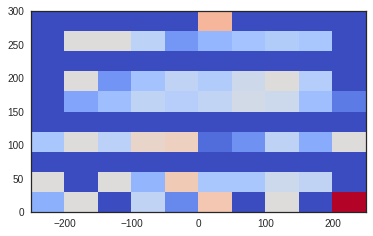

In [9]:
def shiftedColorMap(cmap, start=0, midpoint=0.5, stop=1.0, name='shiftedcmap'):
    '''
    Function to offset the "center" of a colormap. Useful for
    data with a negative min and positive max and you want the
    middle of the colormap's dynamic range to be at zero

    Input
    -----
      cmap : The matplotlib colormap to be altered
      start : Offset from lowest point in the colormap's range.
          Defaults to 0.0 (no lower ofset). Should be between
          0.0 and `midpoint`.
      midpoint : The new center of the colormap. Defaults to 
          0.5 (no shift). Should be between 0.0 and 1.0. In
          general, this should be  1 - vmax/(vmax + abs(vmin))
          For example if your data range from -15.0 to +5.0 and
          you want the center of the colormap at 0.0, `midpoint`
          should be set to  1 - 5/(5 + 15)) or 0.75
      stop : Offset from highets point in the colormap's range.
          Defaults to 1.0 (no upper ofset). Should be between
          `midpoint` and 1.0.
    '''
    import matplotlib
    cdict = {
        'red': [],
        'green': [],
        'blue': [],
        'alpha': []
    }

    # regular index to compute the colors
    reg_index = np.linspace(start, stop, 257)

    # shifted index to match the data
    shift_index = np.hstack([
        np.linspace(0.0, midpoint, 128, endpoint=False), 
        np.linspace(midpoint, 1.0, 129, endpoint=True)
    ])

    for ri, si in zip(reg_index, shift_index):
        r, g, b, a = cmap(ri)

        cdict['red'].append((si, r, r))
        cdict['green'].append((si, g, g))
        cdict['blue'].append((si, b, b))
        cdict['alpha'].append((si, a, a))

    newcmap = matplotlib.colors.LinearSegmentedColormap(name, cdict)
    plt.register_cmap(cmap=newcmap)

    return newcmap

shifted_cmap = shiftedColorMap(plt.get_cmap(name), midpoint=0.5, name='shifted')

plt.imshow(heatmap.T, extent=extent, origin='lower',cmap=shifted_cmap)